# ·· STARTING POINT 

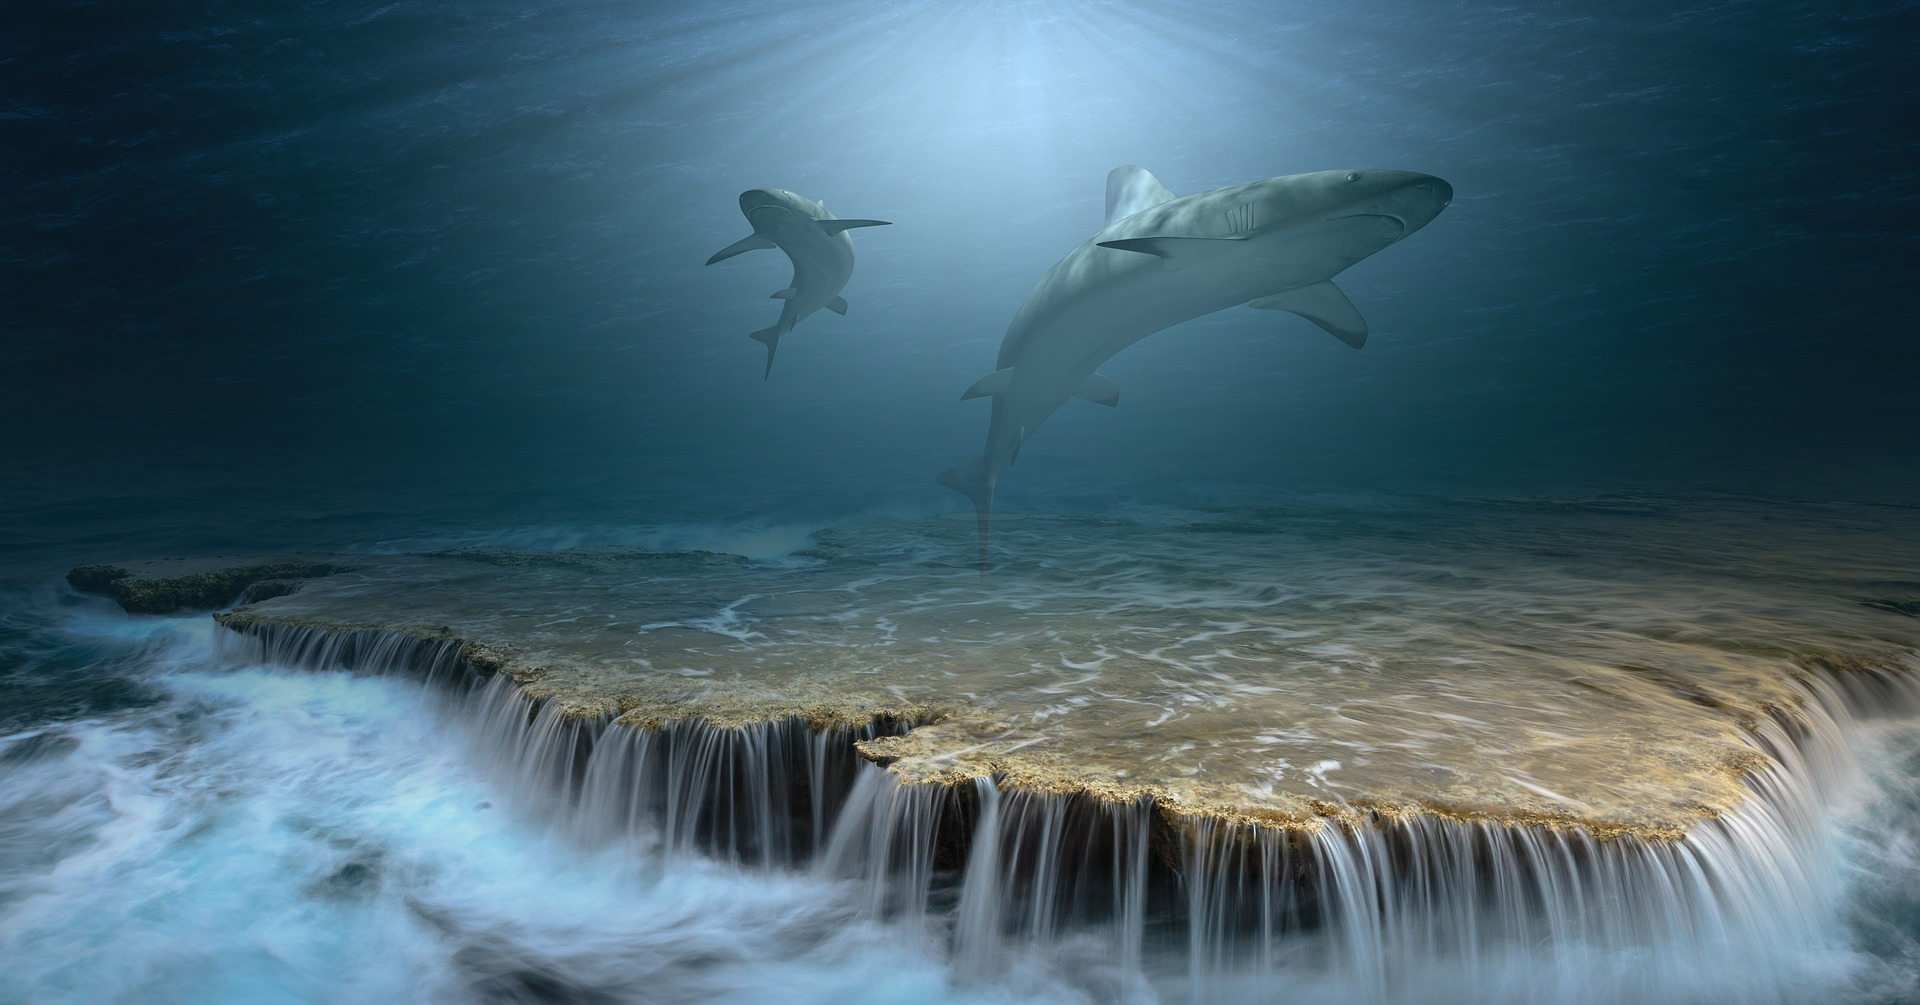

For this project, we are given a dataset with historical records of reported cases of shark attacks from ancient times to 2018. The information provided is vast but inconsistent.  
To start and clean the original database, I imported Pandas and Numpy libraries and also the csv file. To read this document we needed the "Cp1252" encoding


In [1]:
import pandas as pd 
import numpy as np
from Operaciones import *
#abro el documento
att = pd.read_csv("INPUTS/attacks.csv", encoding = "Cp1252")

## ··FIRST STEPS

I explore rows and columns in order to find duplicates to dismiss discard columns and rows that have inner inconsistencies. I will do this several times throughout the cleaning process. In order to make reading easier, I will just comment them without printing most of them unless necessary for the cleaning process.

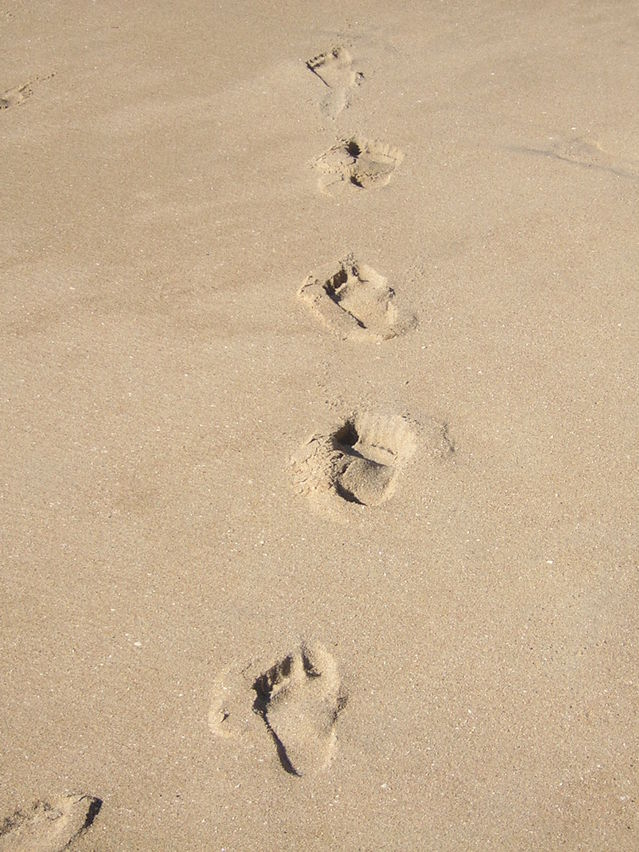




Because I wanted to explore the whole data content, sometimes I used the command "pd.set_option('display.max_rows', None)". 
I explore null values in rows and columns and then I found several rows and columns that can be deleted prior a deeper research of data.
I also studied columns one by one.
I looked for null values in both, rows and columns.

Then I decided to drop the ones below as they do not give me information that I can use for this research.

"Unnamed: 22", "Unnamed: 23","pdf","Name", "Sex ", "Investigator or Source", "pdf", "href formula", "href"



In [2]:
att.head() #I do a first survey to explore data
pd.set_option('display.max_rows', None)

#display(att)

In [3]:
att.columns


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
att.shape

(25723, 24)

In [5]:
att.isnull().sum().sort_values(ascending=True).head()

Case Number       17021
original order    19414
Date              19421
Case Number.2     19421
Case Number.1     19421
dtype: int64

In [6]:
att[["Year", "Type", "Injury", "Country", "Area", "Fatal (Y/N)", "Age", "Time"]].head(2)

,Year,Type,Injury,Country,Area,Fatal (Y/N),Age,Time
0,2018.0,Boating,"No injury to occupant, outrigger canoe and pad...",USA,California,N,57,18h00
1,2018.0,Unprovoked,Minor injury to left thigh,USA,Georgia,N,11,14h00 -15h00


In [7]:
att[["Case Number.1", "Case Number.2", "href", "pdf", "href formula"]].head(2)

,Case Number.1,Case Number.2,href,pdf,href formula
0,2018.06.25,2018.06.25,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,2018.06.18,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [8]:
att[["Fatal (Y/N)", "Location", "Activity", "Species ", "Time"]].head(2)

,Fatal (Y/N),Location,Activity,Species,Time
0,N,"Oceanside, San Diego County",Paddling,White shark,18h00
1,N,"St. Simon Island, Glynn County",Standing,NaN,14h00 -15h00


In [9]:
att[["Unnamed: 22", "Unnamed: 23"]].head(2)

,Unnamed: 22,Unnamed: 23
0,NaN,NaN
1,NaN,NaN


In [10]:
att_s = att.drop(columns= ["Unnamed: 22", "Unnamed: 23","pdf","Name", "Sex ", "Investigator or Source", "pdf", "href formula", "href"])     

In [11]:
for col, numnulls in att_s.isnull().sum().items():
    if numnulls > 0:
        print(f"{col} {numnulls}")

Case Number 17021
Date 19421
Year 19423
Type 19425
Country 19471
Area 19876
Location 19961
Activity 19965
Age 22252
Injury 19449
Fatal (Y/N) 19960
Time 22775
Species  22259
Case Number.1 19421
Case Number.2 19421
original order 19414


In [12]:
#att_s.columns

## ..TO CONTINUE 

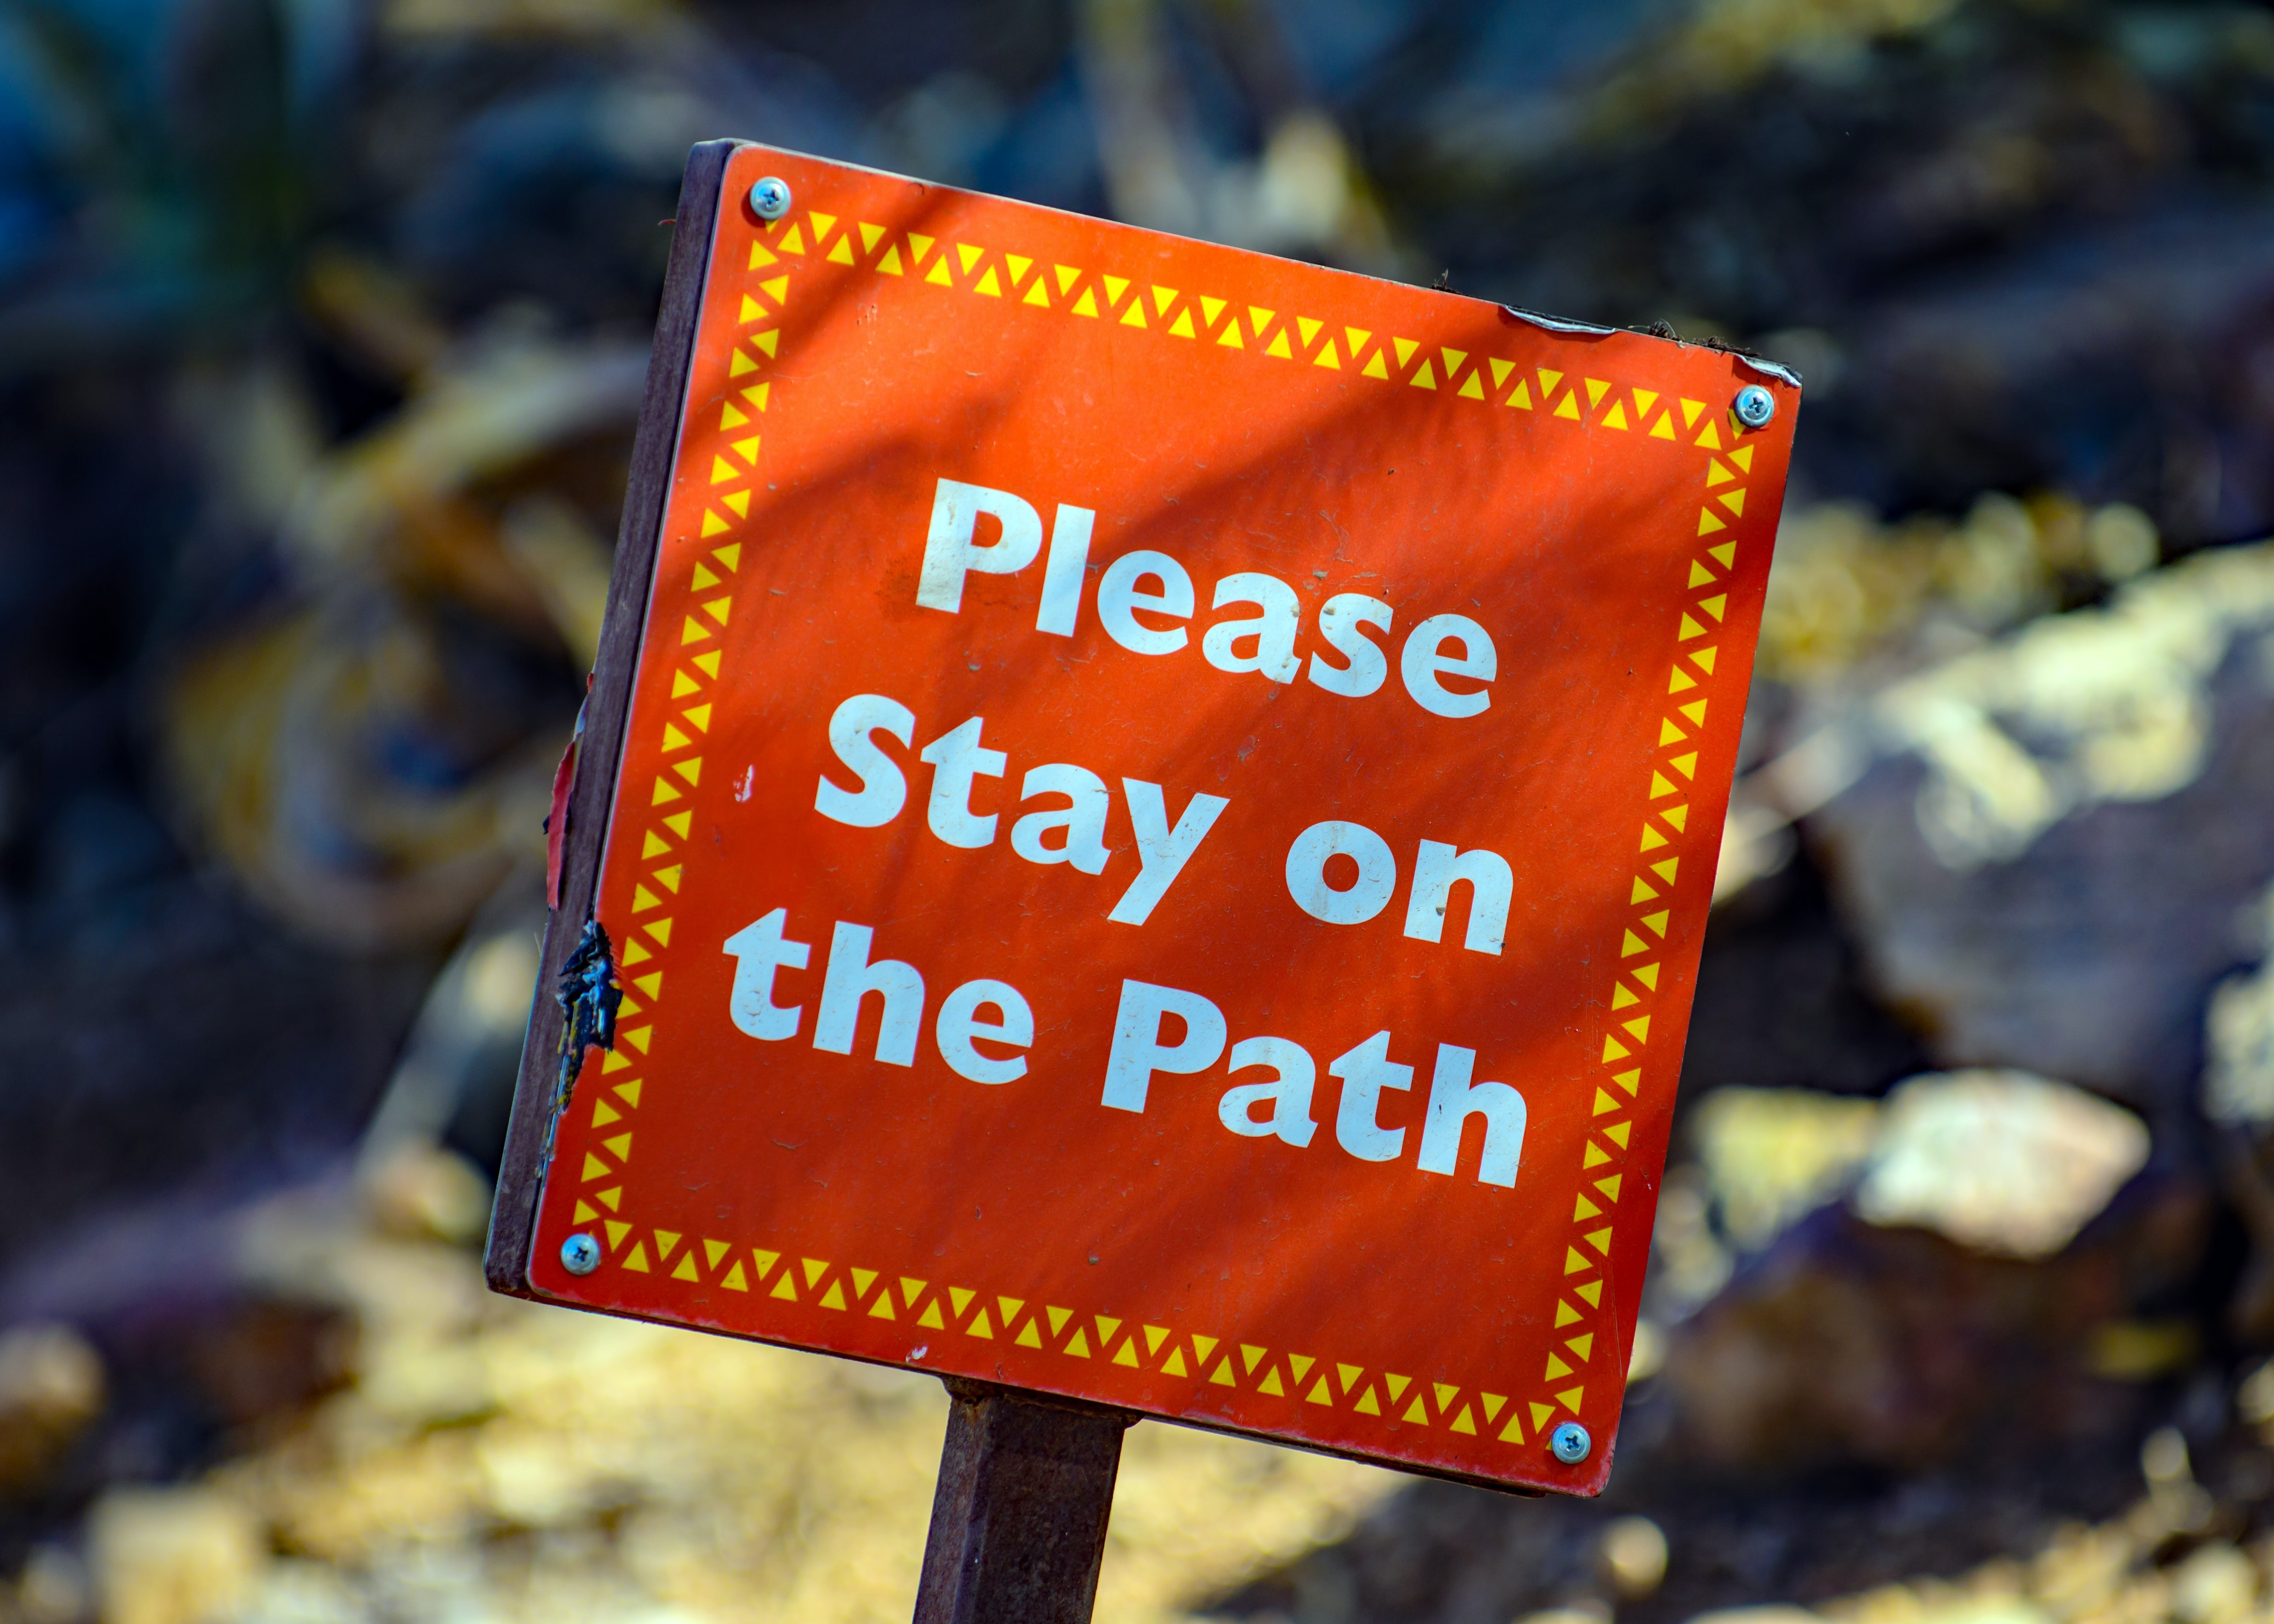

Once deleted the rows and columns with null values, I rename the columns that I might use for the study in order to avoid ambiguous names. I drop some more columns, I already have an idea of what I want to analyze and these columns do not contribute to test my hypothesis. 
I find several rows with all NaN values, so I proceed to drop them.. but indeed, there are 8 rows that still have NaN except for a column. I check it and I decide I can drop these rows one by one.

In [13]:
att_s.rename(columns={'Case Number':"CaseNumber",'Fatal (Y/N)': 'Fatal', 'Species ': 'Species','Case Number.1': 'Case1', 'Case Number.2': 'Case2'}, inplace=True)


In [14]:
att_clean = att_s.dropna(how = "all")
att_clean.shape

(8703, 16)

I go forth and back exploring the data to decide which columns should I keep. I select some, look at the resulting dataFrame.  

In [15]:
#att_clean.head(60)

In [16]:

att_clean2 = att_clean.drop(columns= ["CaseNumber", "Case2", "Year", "Location", "Time", "Case1", "Species"])


In [17]:
att_clean2 = att_clean2.dropna(how = "all")
att_clean2.tail()


,Date,Type,Country,Area,Activity,Age,Injury,Fatal,original order
6304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0


In [18]:
study_att = att_clean2.drop([6302, 6303, 6304, 6305, 6306, 6307, 6308], axis = 0) 

Over the data that I plan to use to test my hypothesis, I explore, again null values.


In [19]:
study_att.isnull().sum().sort_values(ascending=False).head(10)


Age               2831
Activity           544
Fatal              539
Area               455
Country             50
Injury              28
Type                 4
original order       0
Date                 0
dtype: int64

I already have shorter and neater database, but still, there is a lot of work to do.

In [20]:
#study_att.columns
study_att.shape

(6302, 9)

Fatal, Injury and Activity columns interest me specially, but data in some of of them are too messy.

In [21]:
study_att[["Fatal", "Injury", "Activity"]].head()


,Fatal,Injury,Activity
0,N,"No injury to occupant, outrigger canoe and pad...",Paddling
1,N,Minor injury to left thigh,Standing
2,N,Injury to left lower leg from surfboard skeg,Surfing
3,N,Minor injury to lower leg,Surfing
4,N,Lacerations to leg & hand shark PROVOKED INCIDENT,Free diving


In [22]:
study_att.Injury.value_counts().head()


FATAL          802
Survived        97
Foot bitten     87
No injury       82
Leg bitten      72
Name: Injury, dtype: int64

In [23]:
study_att.Fatal.value_counts()


N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal, dtype: int64

In [24]:
pd.set_option('display.max_rows', None)
study_att[["Fatal", "Injury"]].head()


,Fatal,Injury
0,N,"No injury to occupant, outrigger canoe and pad..."
1,N,Minor injury to left thigh
2,N,Injury to left lower leg from surfboard skeg
3,N,Minor injury to lower leg
4,N,Lacerations to leg & hand shark PROVOKED INCIDENT


To check the relationship between NaN in Injury and the content of Fatal. 
Given that in both cases there is no data, these rows can be deleted. I just leave the head of the columns, but I explored all cases

In [25]:
study_att[study_att.Injury.isnull()][["Injury","Fatal"]].head()

,Injury,Fatal
1270,NaN,UNKNOWN
1366,NaN,NaN
2250,NaN,UNKNOWN
2267,NaN,UNKNOWN
2648,NaN,UNKNOWN


In [26]:
study_att.dropna(subset=['Injury'], inplace=True)

In [27]:
study_att[study_att.Fatal.isnull()][["Injury","Fatal", "Age"]].head()


,Injury,Fatal,Age
27,"Multiple severe injuries to arms and leg, leg ...",NaN,34
76,FATAL,NaN,31
79,"Lacerations to right ankle, foot & toe",NaN,33
84,"FATAL, but death was probably due to drowning",NaN,25
98,Lacerations to left foot,NaN,11


In [28]:
study_att["Fatal"].fillna("0", inplace=True)


In [36]:
study_att["Injury"] = study_att["Injury"].str.lower()



In [37]:
study_att["Fatal"]= study_att.apply(lambda row: Fatal_injury(row["Fatal"],row["Injury"]) , axis=1)



In [38]:
study_att[["Fatal", "Injury"]].head()


,Fatal,Injury
0,N,"no injury to occupant, outrigger canoe and pad..."
1,N,minor injury to left thigh
2,N,injury to left lower leg from surfboard skeg
3,N,minor injury to lower leg
4,N,lacerations to leg & hand shark provoked incident


In [39]:
study_att["Fatal"].isnull().sum()


0

In [40]:
study_att.Fatal.value_counts()

N          4805
Y          1407
UNKNOWN      51
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal, dtype: int64

Given that null values in Injury correspond to doubtfull attacks of sharks, I decide to drop these rows in order to avoid untruthful information. I check everything worked.


In [41]:
study_att["Injury"].isnull().sum()

0

In [42]:
study_att["Activity"].isnull().sum()

532

Given that NaN Activity mainly means that the activity is unknown, I decide to change null values into "Unknown"


In [43]:
study_att.Activity.value_counts()
study_att[study_att.Activity.isnull()][["Injury","Fatal", "Activity"]]
study_att["Activity"] = study_att["Activity"].fillna("Unknown")

In [44]:
study_att["Activity"].isnull().sum()

0

## .. FINALLY

Now I really want to have clean data to work with.
In this section I clean rows content, I unify criteria and select data.


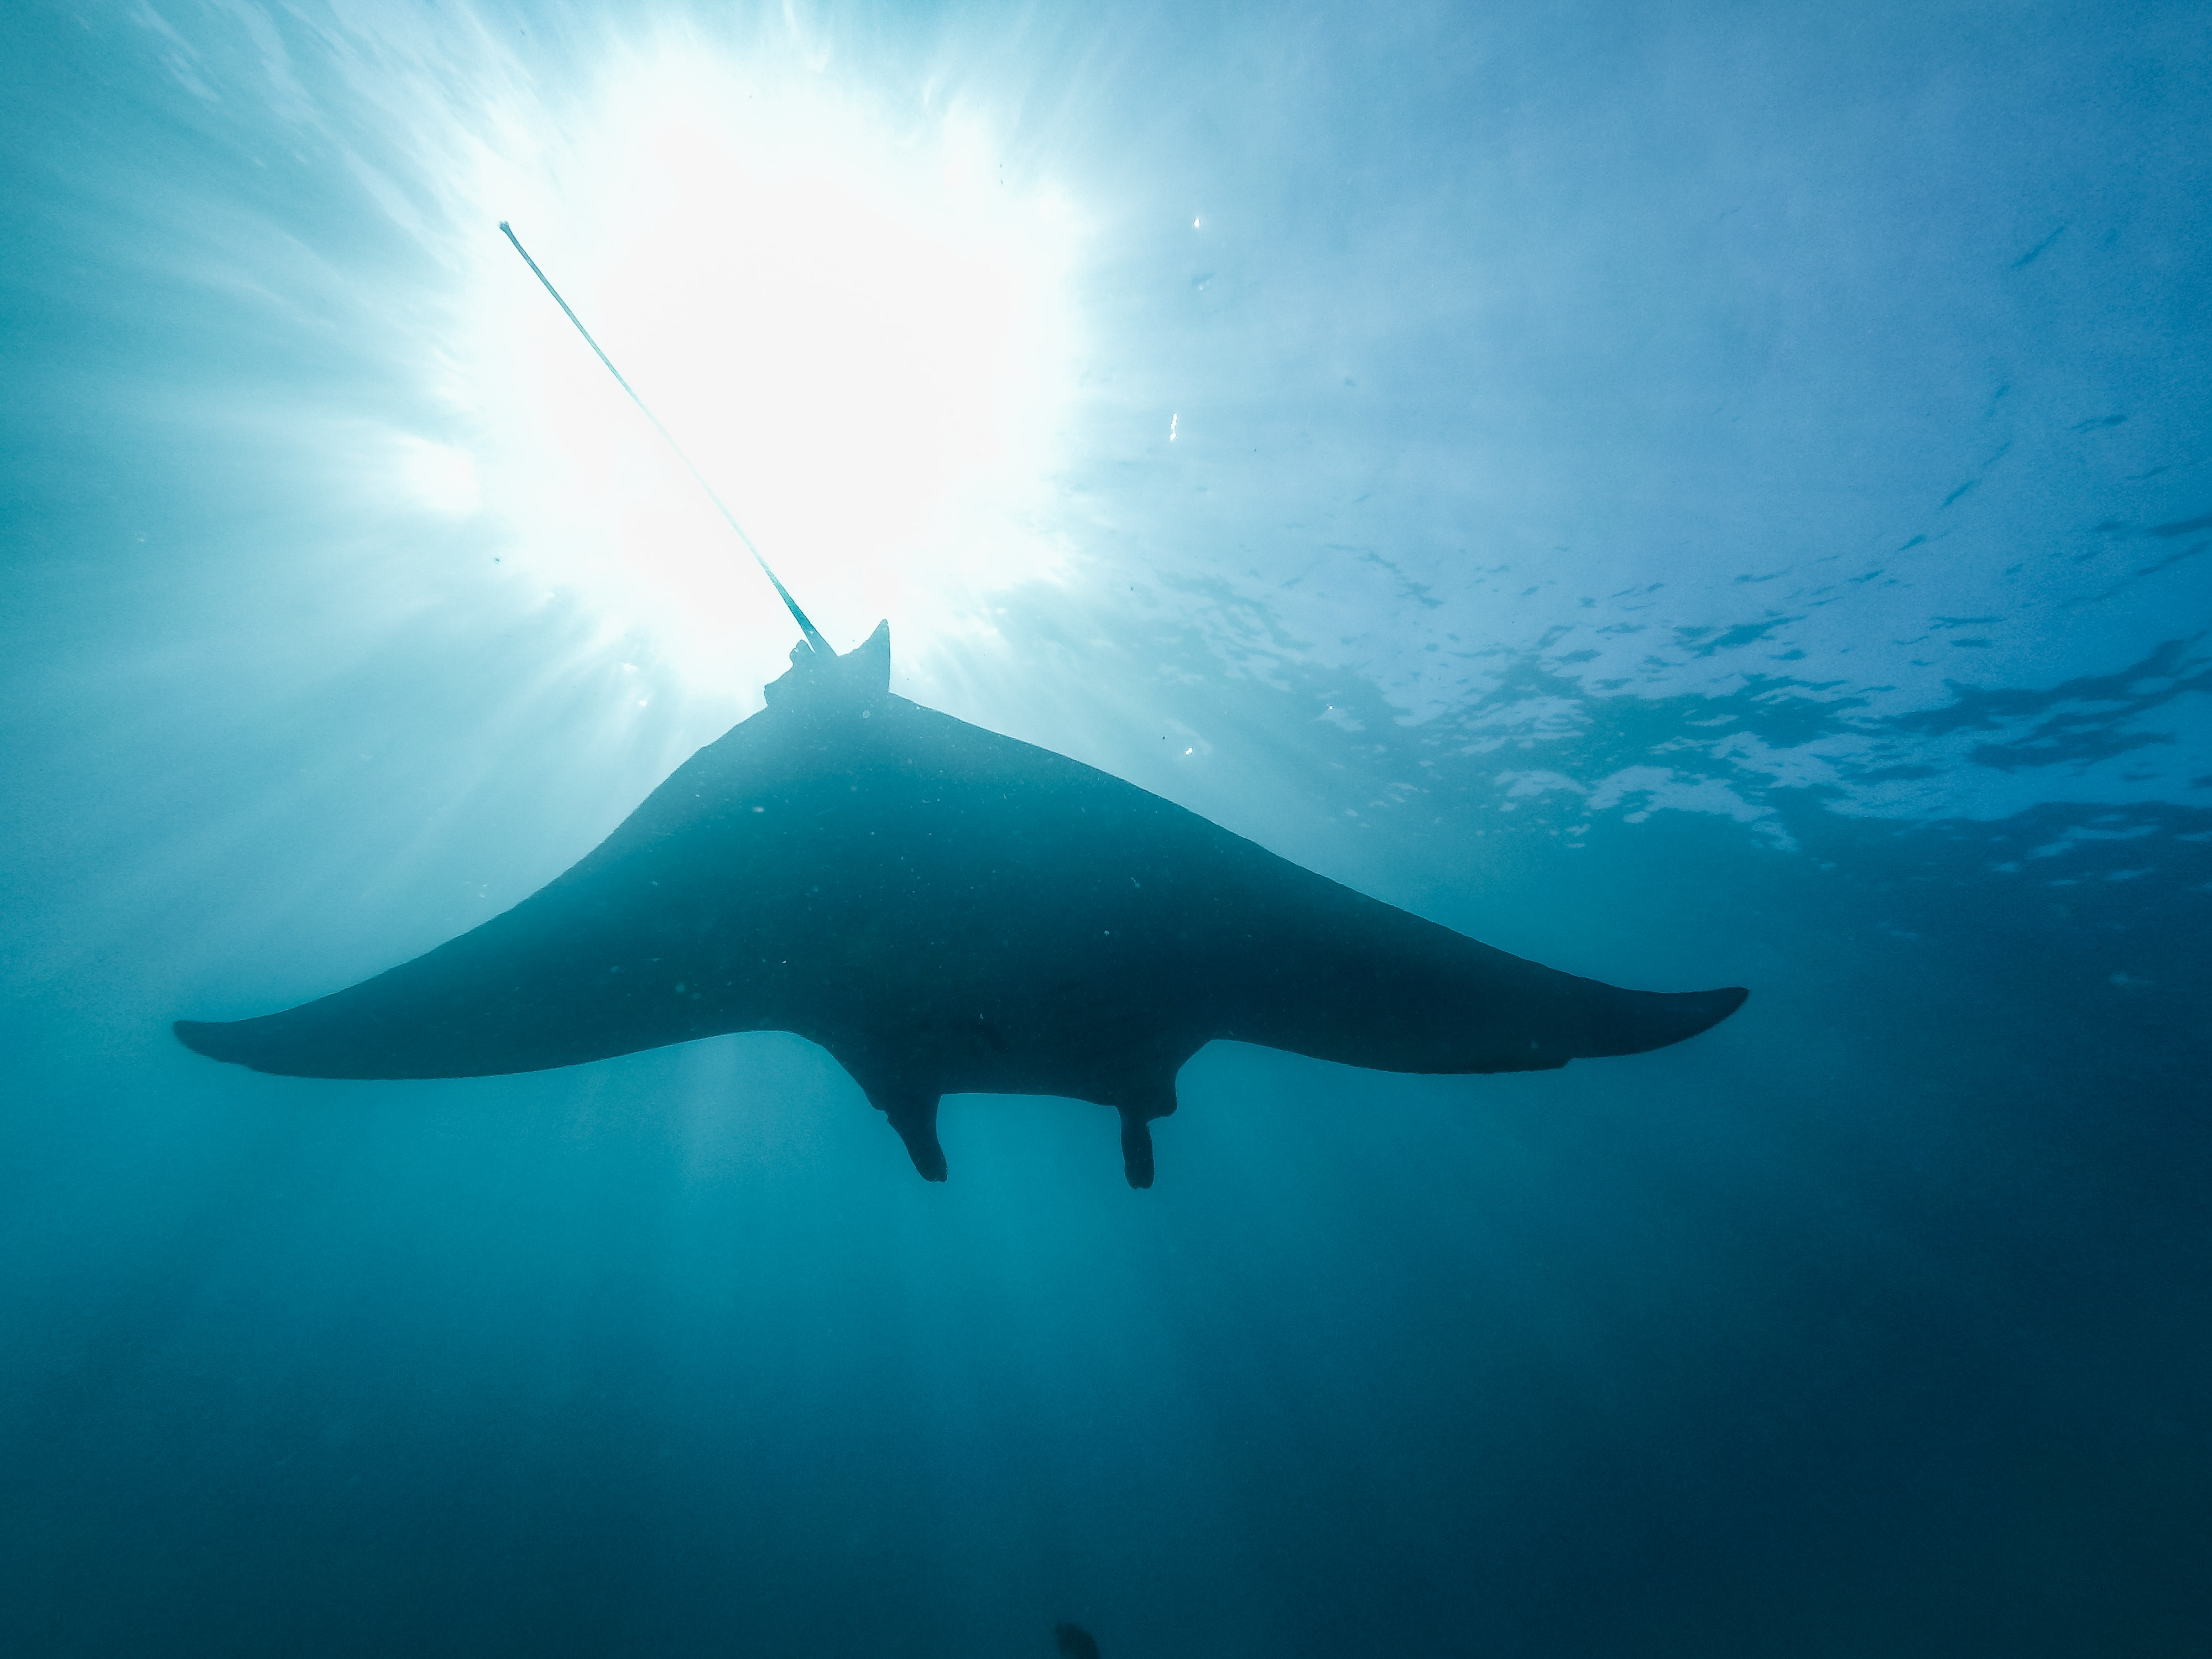

I start with Fatal, which has an easy fix and then I will work on the other two, and for this, I will use both str.startswith and two functions.
I also delete the rest of the columns that I will no longer use.

In [45]:
study_att.loc[study_att["Fatal"].str.startswith(" N")] = "N"
study_att.loc[study_att["Fatal"].str.startswith("N ")] = "N"
study_att.loc[study_att["Fatal"].str.startswith("M")] = "N"
study_att.loc[study_att["Fatal"].str.startswith("y")] = "Y"
study_att.loc[study_att["Fatal"].str.startswith("2017")] = "N"

study_att.Fatal.value_counts()


N          4815
Y          1408
UNKNOWN      51
Name: Fatal, dtype: int64

In [46]:
study_att = study_att.drop(columns= ["original order", "Date", "Age", "Area", "Type"])

In [47]:
study_att.head()

,Country,Activity,Injury,Fatal
0,USA,Paddling,"no injury to occupant, outrigger canoe and pad...",N
1,USA,Standing,minor injury to left thigh,N
2,USA,Surfing,injury to left lower leg from surfboard skeg,N
3,AUSTRALIA,Surfing,minor injury to lower leg,N
4,MEXICO,Free diving,lacerations to leg & hand shark provoked incident,N


In [48]:
study_att.shape

(6274, 4)

To make it easier to filter, I use str.lower to have all the words in the column in lowercase

In [49]:
study_att["Injury"] = study_att["Injury"].str.lower()
study_att[["Injury"]].head()


,Injury
0,"no injury to occupant, outrigger canoe and pad..."
1,minor injury to left thigh
2,injury to left lower leg from surfboard skeg
3,minor injury to lower leg
4,lacerations to leg & hand shark provoked incident


I went one by one, checking on all Injury values, for the shake of simplicity, I leave the head alone. 
There it is, following, the function I made in order to clean data withouth losing too many values.

In [50]:
study_att.Injury.value_counts().head()


fatal          803
survived        96
foot bitten     87
no injury       86
leg bitten      72
Name: Injury, dtype: int64

I create and apply the function

In [51]:
study_att["Injury_type"] = study_att.Injury.apply(InjuryType)

In [52]:
study_att[["Injury", "Injury_type", "Fatal"]].head()


,Injury,Injury_type,Fatal
0,"no injury to occupant, outrigger canoe and pad...",No harm,N
1,minor injury to left thigh,Lower limbs,N
2,injury to left lower leg from surfboard skeg,Lower limbs,N
3,minor injury to lower leg,Lower limbs,N
4,lacerations to leg & hand shark provoked incident,Lower limbs,N


In [53]:
study_att.Injury_type.value_counts().head()


Lower limbs      2230
Fatal            1361
No harm           834
Upper limbs       798
Doubtful data     414
Name: Injury_type, dtype: int64

In [54]:
study_att.Injury_type.value_counts().head()


Lower limbs      2230
Fatal            1361
No harm           834
Upper limbs       798
Doubtful data     414
Name: Injury_type, dtype: int64

Once I sorted the data with my function, I can delete now the information that I found useless for the study

In [55]:
study_att.drop(study_att[study_att['Injury_type'] == "Doubtful data"].index, inplace = True) 
study_att.drop(study_att[study_att['Injury_type'] == "No information about type of injury"].index, inplace = True) 
study_att.drop(study_att[study_att['Injury_type'] == "Deads related with sharks but not due to attacks"].index, inplace = True) 

And this is the result

In [56]:
study_att.Injury_type.value_counts()

Lower limbs    2230
Fatal          1361
No harm         834
Upper limbs     798
Minor           189
Severe          178
Bitten           81
Lacerations      40
Abrasions        11
Name: Injury_type, dtype: int64

In [57]:
study_att[["Injury", "Injury_type", "Fatal", "Activity"]].head()


,Injury,Injury_type,Fatal,Activity
0,"no injury to occupant, outrigger canoe and pad...",No harm,N,Paddling
1,minor injury to left thigh,Lower limbs,N,Standing
2,injury to left lower leg from surfboard skeg,Lower limbs,N,Surfing
3,minor injury to lower leg,Lower limbs,N,Surfing
4,lacerations to leg & hand shark provoked incident,Lower limbs,N,Free diving


And now I apply the same procedure for the Activity column

In [58]:
study_att["Activity"] = study_att["Activity"].str.lower()
study_att.Activity.value_counts().head()

surfing         937
swimming        812
fishing         400
unknown         372
spearfishing    311
Name: Activity, dtype: int64

In [59]:
study_att["Activity_type"] = study_att.Activity.apply(Activity)


In [60]:
study_att.Activity_type.value_counts()

Swimming                                1683
Surfing                                 1339
Sole cases or undescribed activities    1119
Diving                                   581
Fishing                                  571
Shark fishing                            164
In kayak or canoe                        124
Boating                                  106
Playing                                   15
Sailing                                   13
Skiing                                     7
Name: Activity_type, dtype: int64

In [61]:
study_att.head()

,Country,Activity,Injury,Fatal,Injury_type,Activity_type
0,USA,paddling,"no injury to occupant, outrigger canoe and pad...",N,No harm,In kayak or canoe
1,USA,standing,minor injury to left thigh,N,Lower limbs,Sole cases or undescribed activities
2,USA,surfing,injury to left lower leg from surfboard skeg,N,Lower limbs,Surfing
3,AUSTRALIA,surfing,minor injury to lower leg,N,Lower limbs,Surfing
4,MEXICO,free diving,lacerations to leg & hand shark provoked incident,N,Lower limbs,Diving


A last check to find null values... and, ideed, I find 40 cases in country, so I proceed to delete them

In [62]:
study_att.isnull().sum().sort_values(ascending=False).head(10)


Country          40
Activity_type     0
Injury_type       0
Fatal             0
Injury            0
Activity          0
dtype: int64

In [63]:
#study_att.dropna(how = "any")


In [64]:
study_att.isnull().sum().sort_values(ascending=False).head(10)


Country          40
Activity_type     0
Injury_type       0
Fatal             0
Injury            0
Activity          0
dtype: int64

In [65]:
study_att = study_att.dropna()

In [66]:
study_att.isnull().sum().sort_values(ascending=False).head(10)


Activity_type    0
Injury_type      0
Fatal            0
Injury           0
Activity         0
Country          0
dtype: int64

I delete the former columns Activity and Injury to leave the other two that I created and that have the content already sorted and grouped

In [67]:
clean_attacks = study_att.drop(columns= ["Activity", "Injury"])

I run some exploratory plotbars

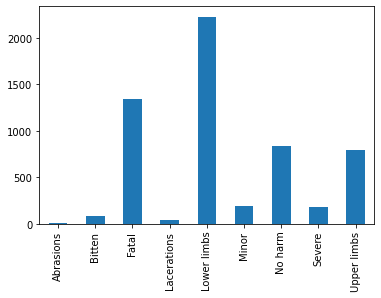

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
study_att.Injury_type.value_counts().sort_index().plot.bar()


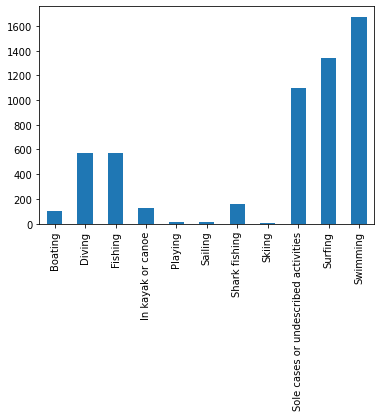

In [72]:
study_att.Activity_type.value_counts().sort_index().plot.bar()


In [73]:
clean_attacks.shape


(5682, 4)

I save my cleaned database, its content has been reduce to 4 columns and almost 5800 rows.

In [74]:
clean_attacks.to_csv("output/attacks_clean.csv")